# 2.1: 
Möchte Vorhersagen für die spalte 14 Salaries machen

# 2.2

ich habe die ersten ungefähr 100000 zeilen rausgenommen(bis salary 30000 war) da diese daten die davor kahmen waarscheindlich nicht für ein ganzes jahr da gearbeitet haben.

In [1]:
import pandas as pd
import os
salarys = pd.read_csv("Employee_Salary_Compensation.csv", sep = ';')

In [2]:
salarys["Organization Group Code"].mode()

0    2
Name: Organization Group Code, dtype: int64

In [3]:
salarys["Job Family Code"].mode()

0    2300
Name: Job Family Code, dtype: object

In [4]:
salarys["Job Code"].mode()

0    9163.0
Name: Job Code, dtype: float64

In [5]:
salarys["Year Type"].mode()

0    Calendar
Name: Year Type, dtype: object

In [6]:
salarys["Year"].median()

2017.0

In [7]:
salarys["Organization Group"].mode()

0    Public Works, Transportation & Commerce
Name: Organization Group, dtype: object

In [8]:
salarys["Department Code"].mode()

0    DPH
Name: Department Code, dtype: object

In [9]:
salarys["Department"].mode()

0    Public Health
Name: Department, dtype: object

In [10]:
salarys["Union Code"].mode()

0    790.0
Name: Union Code, dtype: float64

In [11]:
salarys["Union"].mode()

0    SEIU, Local 1021, Misc
Name: Union, dtype: object

In [12]:
salarys["Job Family"].mode()

0    Nursing
Name: Job Family, dtype: object

In [13]:
salarys["Job"].mode()

0    Transit Operator
Name: Job, dtype: object

In [14]:
salarys["Employee Identifier"].mode()

0    48064
Name: Employee Identifier, dtype: int64

In [15]:
salarys["Salaries"].mean()

90509.58669537885

In [16]:
salarys["Overtime"].mean()

7319.350074573189

In [17]:
salarys["Total Salary"].mean()

102320.5175529999

In [18]:
salarys["Retirement"].mean()

18275.985913683257

In [19]:
salarys["Other Benefits"].mean()

6475.58440820638

In [20]:
salarys["Total Benefits"].mean()

37564.46848766356

In [21]:
salarys["Total Compensation"].mean()

139884.98604066347

# 2.3

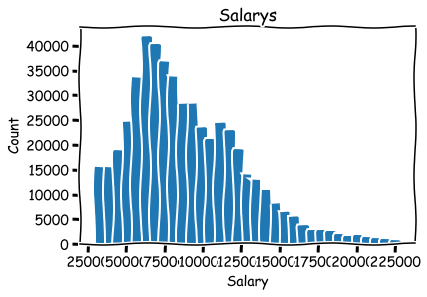

In [22]:
import matplotlib.pyplot as plt
with plt.xkcd():
    plt.hist(salarys["Salaries"].dropna(), bins=range(30000,230000,6000))
    plt.title("Salarys")
    plt.xlabel("Salary")
    plt.ylabel("Count")


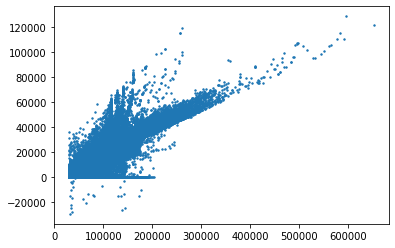

In [23]:
    plt.scatter(salarys["Salaries"], salarys["Retirement"], 2)

# 2.4

In [24]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [25]:
X = salarys[["Year","Organization Group Code", "Department Code", "Job code"]]
y = salarys[["Salaries"]]

In [26]:

oe = preprocessing.OrdinalEncoder().fit(X[["Department Code"]])
salarys[["Department Code"]] = oe.transform(X[["Department Code"]])

In [27]:
oe = preprocessing.OrdinalEncoder().fit(X[["Job code"]])
salarys[["Job code"]] = oe.transform(X[["Job code"]])

In [28]:
X = salarys[["Year","Organization Group Code", "Department Code", "Job code"]]
y = salarys[["Salaries"]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
salarys.head(1000)


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,2,9100,9163.0,Fiscal,2013,"Public Works, Transportation & Commerce",41.0,MTA Municipal Transprtn Agncy,253.0,"Transport Workers - Transit Operators, Local 2...",...,45817,30000.83,0,0.00,30000.83,7713.20,6080.22,839.15,14632.57,44633.40
1,5,900,923.0,Fiscal,2013,Culture & Recreation,48.0,REC Recreation & Park Commsn,351.0,Municipal Executive Association - Miscellaneous,...,32967,30000.99,0,17761.74,47762.73,5313.17,2461.89,4272.49,12047.55,59810.28
2,4,9900,9924.0,Fiscal,2016,Community Health,23.0,DPH Public Health,790.0,"SEIU - Miscellaneous, Local 1021",...,30210,30001.03,0,440.00,30441.03,2343.94,9925.67,2474.75,14744.36,45185.39
3,5,8200,8202.0,Calendar,2020,Culture & Recreation,30.0,Fine Arts Museum,790.0,"SEIU, Local 1021, Misc",...,44076362,30001.28,731,0.00,30732.70,6774.26,19192.76,2168.96,28135.98,58868.68
4,4,2300,2320.0,Fiscal,2018,Community Health,23.0,Public Health,791.0,"SEIU, Local 1021, RN",...,36793627,30003.97,0,447.96,30227.95,5595.57,3462.35,2545.16,11603.08,41831.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7200,7254.0,Fiscal,2014,General Administration & Finance,1.0,ADM Gen Svcs Agency-City Admin,130.0,"Automotive Machinists, Local 1414",...,17237,30367.60,9338,0.00,39705.57,6474.36,3643.50,3063.76,13181.62,52887.19
996,5,3600,3602.0,Fiscal,2020,Culture & Recreation,39.0,Public Library,790.0,"SEIU, Local 1021, Misc",...,42421679,30368.53,0,432.51,30801.04,7462.70,8019.47,2539.38,18021.55,48822.59
997,2,7500,7502.0,Fiscal,2013,"Public Works, Transportation & Commerce",24.0,DPW GSA - Public Works,261.0,"Laborers, Local 261",...,855,30368.63,942,1496.44,32807.00,1623.24,7739.54,2539.93,11902.71,44709.71
998,2,5300,5381.0,Calendar,2015,"Public Works, Transportation & Commerce",3.0,AIR Airport Commission,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,49967,30369.20,0,0.00,30369.20,5395.64,6672.20,2453.49,14521.33,44890.53
